In [1]:
import urllib.request
import pandas as pd

In [2]:
source_url = "ftp://ftp.ncbi.nlm.nih.gov/genomes/refseq/bacteria/Escherichia_coli/reference/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz"
gff_file = "E_coli.gff.gz"


In [3]:
urllib.request.urlretrieve(source_url, gff_file)

('E_coli.gff.gz', <email.message.Message at 0x19b28aa41f0>)

In [4]:
gff_data = pd.read_csv(gff_file,
                       sep="\t", 
                       comment='#', 
                       names=["seqid", "source", "type", "start", "end", "score", "strand", "phase", "attributes"])

In [5]:
gff_data

,seqid,source,type,start,end,score,strand,phase,attributes
0,NC_000913.3,RefSeq,region,1,4641652,.,+,.,ID=NC_000913.3:1..4641652;Dbxref=taxon:511145;...
1,NC_000913.3,RefSeq,gene,190,255,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E..."
2,NC_000913.3,RefSeq,CDS,190,255,.,+,0,ID=cds-NP_414542.1;Parent=gene-b0001;Dbxref=Un...
3,NC_000913.3,RefSeq,gene,337,2799,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E..."
4,NC_000913.3,RefSeq,CDS,337,2799,.,+,0,ID=cds-NP_414543.1;Parent=gene-b0002;Dbxref=Un...
...,...,...,...,...,...,...,...,...,...
10116,NC_000913.3,RefSeq,CDS,4639590,4640306,.,-,0,ID=cds-NP_418818.1;Parent=gene-b4401;Dbxref=Un...
10117,NC_000913.3,RefSeq,gene,4640402,4640542,.,+,.,"ID=gene-b4402;Dbxref=ASAP:ABE-0014437,ECOCYC:G..."
10118,NC_000913.3,RefSeq,CDS,4640402,4640542,.,+,0,ID=cds-NP_418819.1;Parent=gene-b4402;Dbxref=Un...
10119,NC_000913.3,RefSeq,gene,4640942,4641628,.,+,.,"ID=gene-b4403;Dbxref=ASAP:ABE-0014442,ECOCYC:E..."


In [6]:
gff_data ["type"].unique()

array(['region', 'gene', 'CDS', 'repeat_region', 'mobile_genetic_element',
       'ncRNA', 'exon', 'rRNA', 'tRNA', 'pseudogene', 'sequence_feature',
       'recombination_feature', 'origin_of_replication'], dtype=object)

In [7]:
gff_data["type"].value_counts ()

gene                      4419
CDS                       4379
repeat_region              697
exon                       180
pseudogene                 166
tRNA                        86
ncRNA                       72
mobile_genetic_element      49
sequence_feature            48
rRNA                        22
region                       1
origin_of_replication        1
recombination_feature        1
Name: type, dtype: int64

In [8]:
#filter for rows or entries that equal to gene. If the type at the entry 1 has a gene, we get a true.
#on zero there is no gene, so we get a false
gff_data["type"] == "gene"

0        False
1         True
2        False
3         True
4        False
         ...  
10116    False
10117     True
10118    False
10119     True
10120    False
Name: type, Length: 10121, dtype: bool

In [9]:
#results in the same data frame as previously, but only with lines with a "gene value" also index changed
gff_data[gff_data["type"] == "gene"]

,seqid,source,type,start,end,score,strand,phase,attributes
1,NC_000913.3,RefSeq,gene,190,255,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E..."
3,NC_000913.3,RefSeq,gene,337,2799,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E..."
5,NC_000913.3,RefSeq,gene,2801,3733,.,+,.,"ID=gene-b0003;Dbxref=ASAP:ABE-0000010,ECOCYC:E..."
7,NC_000913.3,RefSeq,gene,3734,5020,.,+,.,"ID=gene-b0004;Dbxref=ASAP:ABE-0000012,ECOCYC:E..."
9,NC_000913.3,RefSeq,gene,5234,5530,.,+,.,"ID=gene-b0005;Dbxref=ASAP:ABE-0000015,ECOCYC:G..."
...,...,...,...,...,...,...,...,...,...
10111,NC_000913.3,RefSeq,gene,4636696,4638120,.,+,.,"ID=gene-b4399;Dbxref=ASAP:ABE-0014430,ECOCYC:E..."
10113,NC_000913.3,RefSeq,gene,4638178,4639530,.,+,.,"ID=gene-b4400;Dbxref=ASAP:ABE-0014432,ECOCYC:E..."
10115,NC_000913.3,RefSeq,gene,4639590,4640306,.,-,.,"ID=gene-b4401;Dbxref=ASAP:ABE-0014434,ECOCYC:E..."
10117,NC_000913.3,RefSeq,gene,4640402,4640542,.,+,.,"ID=gene-b4402;Dbxref=ASAP:ABE-0014437,ECOCYC:G..."


In [10]:
#show the 
gff_data ["strand"] == "+"

0         True
1         True
2         True
3         True
4         True
         ...  
10116    False
10117     True
10118     True
10119     True
10120     True
Name: strand, Length: 10121, dtype: bool

In [11]:
gff_data_genes = gff_data[(gff_data["type"] == "gene") & (gff_data["strand"] == "+")]

In [12]:
gff_data_genes["length"] = gff_data_genes["end"] - gff_data_genes["start"] + 1

<ipython-input-12-26a8e5496ba4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gff_data_genes["length"] = gff_data_genes["end"] - gff_data_genes["start"] + 1


In [14]:
gff_data_genes

,seqid,source,type,start,end,score,strand,phase,attributes,length
1,NC_000913.3,RefSeq,gene,190,255,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E...",66
3,NC_000913.3,RefSeq,gene,337,2799,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E...",2463
5,NC_000913.3,RefSeq,gene,2801,3733,.,+,.,"ID=gene-b0003;Dbxref=ASAP:ABE-0000010,ECOCYC:E...",933
7,NC_000913.3,RefSeq,gene,3734,5020,.,+,.,"ID=gene-b0004;Dbxref=ASAP:ABE-0000012,ECOCYC:E...",1287
9,NC_000913.3,RefSeq,gene,5234,5530,.,+,.,"ID=gene-b0005;Dbxref=ASAP:ABE-0000015,ECOCYC:G...",297
...,...,...,...,...,...,...,...,...,...,...
10109,NC_000913.3,RefSeq,gene,4636007,4636696,.,+,.,"ID=gene-b4398;Dbxref=ASAP:ABE-0014428,ECOCYC:E...",690
10111,NC_000913.3,RefSeq,gene,4636696,4638120,.,+,.,"ID=gene-b4399;Dbxref=ASAP:ABE-0014430,ECOCYC:E...",1425
10113,NC_000913.3,RefSeq,gene,4638178,4639530,.,+,.,"ID=gene-b4400;Dbxref=ASAP:ABE-0014432,ECOCYC:E...",1353
10117,NC_000913.3,RefSeq,gene,4640402,4640542,.,+,.,"ID=gene-b4402;Dbxref=ASAP:ABE-0014437,ECOCYC:G...",141


In [15]:
gff_data_genes["length"].mean()

904.2383801196503

In [16]:
gff_data_genes["length"].median()

792.0

In [17]:
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:>

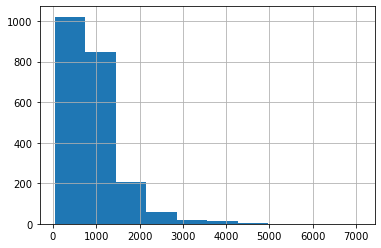

In [18]:
gff_data_genes["length"].hist()

<AxesSubplot:>

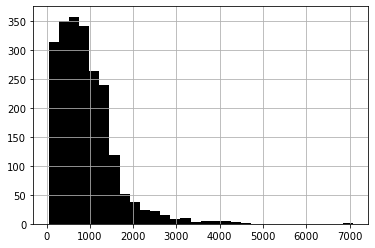

In [19]:
gff_data_genes["length"].hist(bins=30, color="black")

In [20]:
import matplotlib.pyplot as plt

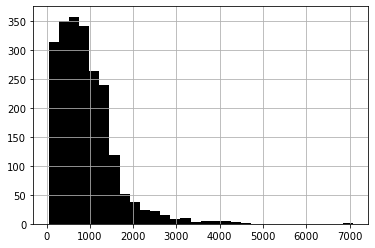

In [21]:
#save as variable ax, because a plot calls it axes object
ax = gff_data_genes["length"].hist(bins=30, color="black")
#create figure with multiple plots?
fig = ax.get_figure()
fig.savefig("histogram.pdf")

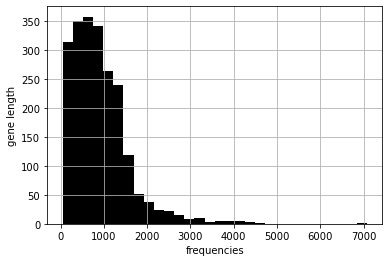

In [22]:
#save as variable ax, because a plot calls it axes object
ax = gff_data_genes["length"].hist(bins=30, color="black")
#make labels
ax.set_ylabel("gene length")
ax.set_xlabel("frequencies")
#create figure from axes object
fig = ax.get_figure()
fig.savefig("histogram.pdf")